In [32]:
# imports
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Ploting Libs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

# For Model Evaluation
from sklearn.model_selection import cross_val_score

**Load the titanic train and test data**

In [33]:
# create the Dataframes from datasets
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

In [34]:
# Display the first 5 rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
# Display the Last 5 rows
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [36]:
# See the shape of our datasets (rows, columns)
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [37]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
# Missing columns data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
# Look for the most common value for Embarked
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

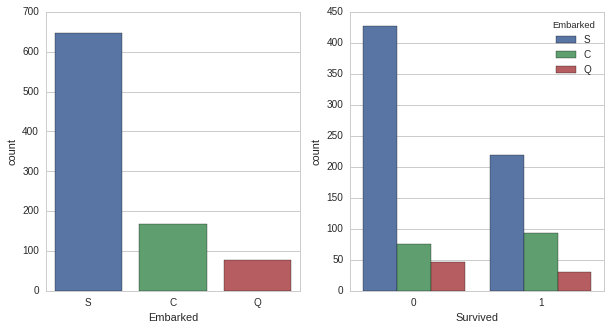

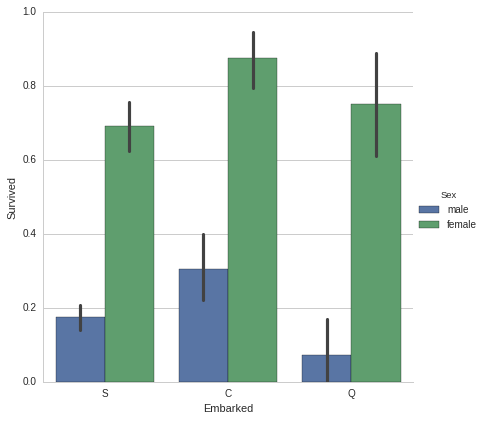

In [11]:
# Embarked

# From this we can see there're a lot of age columns with missing values
# Cabin has a lot of missing values, let's assume it doesn't play 
# a big rule in our predictions
train = train.drop(['PassengerId','Ticket','Cabin', 'Name'], axis=1)
test    = test.drop(['Ticket','Cabin', 'Name'], axis=1)

# fill the two missing values with the most occurred value (S)
train['Embarked'] = train['Embarked'].fillna("S")

# Set up the matplotlib figure
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# Draw barplot to show survivors for Embarked considering Sex
sns.factorplot(x="Embarked", y="Survived", hue="Sex", data=train,
                   size=6, kind="bar")

sns.countplot(x='Embarked', data=train, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=train, order=[0,1], ax=axis2)

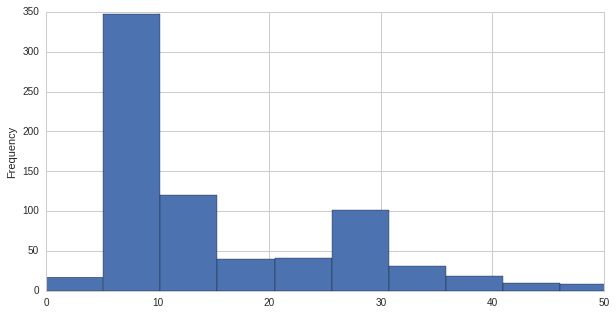

In [12]:
# Fare

# CLean Fare in the test dataset
# Fill the missing value
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# use int instead of float
train['Fare'] = train['Fare'].astype(int)
test['Fare'] = test['Fare'].astype(int)

# create plot
train['Fare'].plot(kind='hist', figsize=(10,5),bins=100, xlim=(0,50))

/home/denisovitch/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/denisovitch/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


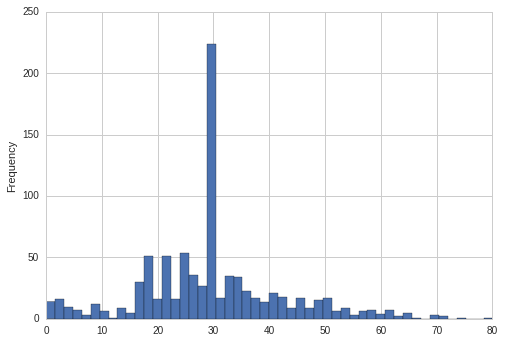

In [13]:
# Age

# fill "NaN" values in empty Age columns
train['Age'][np.isnan(train['Age'])] = train['Age'].mean()
test['Age'][np.isnan(test['Age'])] = test['Age'].mean()

# Now that we haven't missing values we can
# use Age as int instead float
train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

# plot the distribuition of people by age
train['Age'].plot(kind='hist', bins=50)

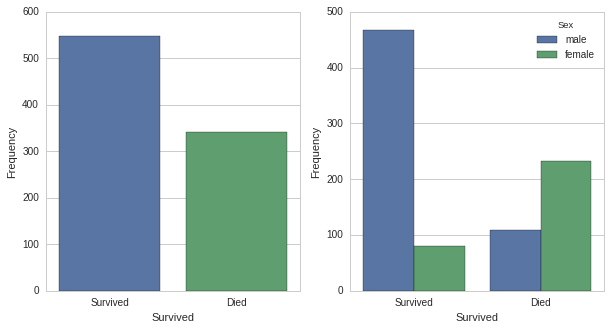

In [14]:
# Sex 

fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# How many people survived Vs Died
#sns.countplot(x="Survived", data=train, palette="muted")
sns.countplot(x='Survived', data=train, order=[0,1], ax=axis1)
axis1.set_ylabel('Frequency')

# Survived people by their gender
#sns.countplot(x="Survived", hue='Sex', data=train, palette="muted")
sns.countplot(x='Survived', hue="Sex", data=train, order=[0,1], ax=axis2)
axis2.set_ylabel("Frequency")

axis1.set_xticklabels(['Survived', 'Died'], rotation=0)
axis2.set_xticklabels(['Survived', 'Died'], rotation=0)

In [15]:
# Transforming categorical data to numeric data for our machine learning model
# Current categorical data: Sex, Embarked

# Sex
train.loc[train["Sex"] == "male", "Sex"] = 0 
train.loc[train["Sex"] == "female", "Sex"] = 1

test.loc[test["Sex"] == "male", "Sex"] = 0 
test.loc[test["Sex"] == "female", "Sex"] = 1

# Embarked
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2

test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,1
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0


In [16]:
# Now we're ready to build the machine learning model
X = train.drop(['Survived'], axis=1) # instances to learn from
y = train['Survived'] # target/responses the model is trying to learn to predict

In [22]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

# Make predictions using the test set.
model.fit(X, y)

# Evaluate acuracy score of the Decision Tree Classifier
# We got 78% with this model
print(cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()) 

0.789121268868


### Make Predictions

In [23]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34,0,0,7,2
1,893,3,1,47,1,0,7,0
2,894,2,0,62,0,0,9,2
3,895,3,0,27,0,0,8,0
4,896,3,1,22,1,1,12,0


In [24]:
predictions = model.predict(test.drop(['PassengerId'], axis=1))

**Create Submissionn File**

In [38]:
# Create a new dataframe
submission = DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv('submission_dt', index=False)